# K-Means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from warnings import filterwarnings
filterwarnings("ignore", category = DeprecationWarning)
filterwarnings("ignore", category = FutureWarning)

In [2]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


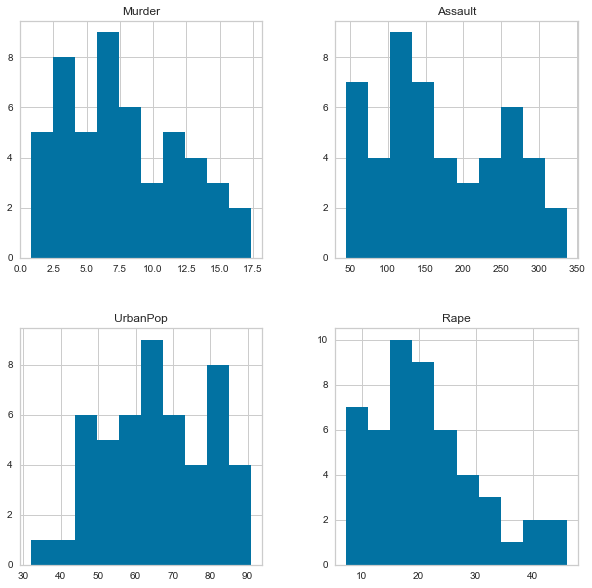

In [6]:
df.hist(figsize=(10,10));

* **n_clusters:** Küme Sayısı

In [7]:
kmeans = KMeans(n_clusters=4).fit(df)
kmeans.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

* **labels_** Gözlemlerin sınıf etiketlerine erişmektedir.

In [8]:
kmeans.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

* İki tane değişken seçeceğiz.
* İki cluster için de görselleştirme yapacağız.

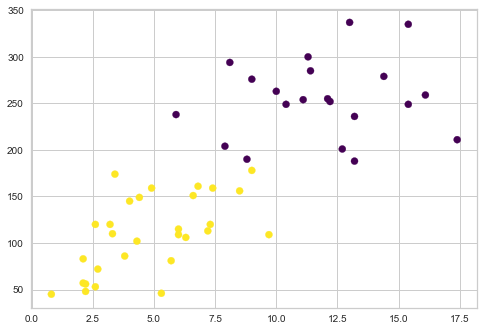

In [9]:
k_means = KMeans(n_clusters=2).fit(df)
kumeler = k_means.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis");

* Merkezleri küme üzerinde işaretliyoruz.

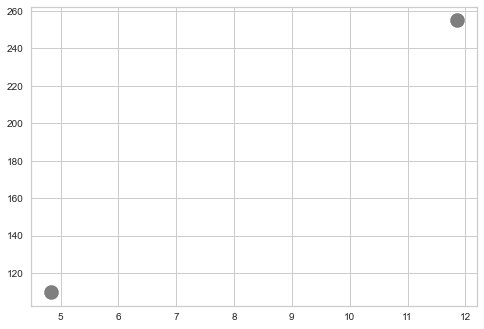

In [10]:
merkezler = k_means.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5);

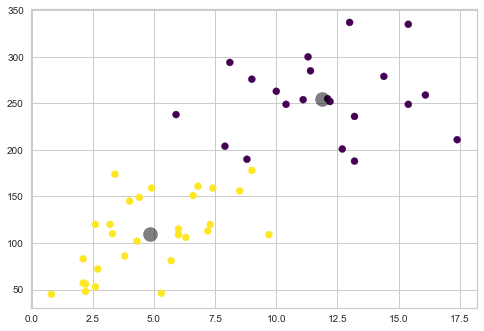

In [11]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5);

## Optimum Küme Sayısının Belirlenmesi

### 1. Elbow Yöntemi

* **ssd** Uzaklık farklarının karelerinin toplamıdır.

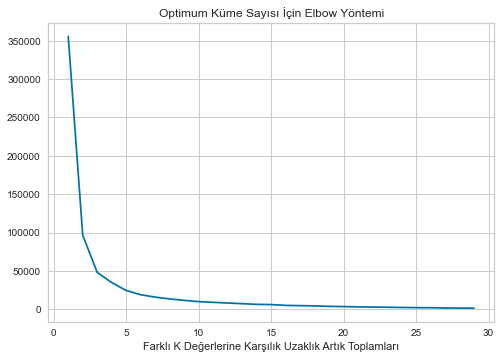

In [12]:
K = range(1,30)
ssd = []

for k in K:
    k_means = KMeans(n_clusters=k).fit(df)
    ssd.append(k_means.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı İçin Elbow Yöntemi");

* Kırılımın en sert olduğu noktaya karar vermemiz gerekiyor.
* 3 küme olması durumunda mantıklı işlem yapılmış olur.
* Küme sayısı gözlem biriminden az olması gerek. (50 tane gözlem vardır)

### 2. Elbow İkinci Yöntemi

* **k=(2,20)** 2-20 arası kümeleri değerlendirir.

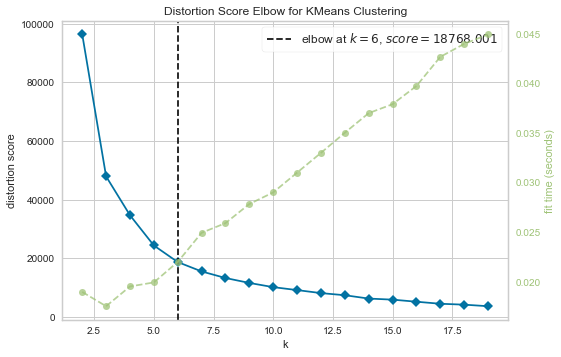

In [13]:
k_means = KMeans()
visu = KElbowVisualizer(k_means, k=(2,20)).fit(df)
visu.poof();

* Önermiş olduğu optimum değer **6**

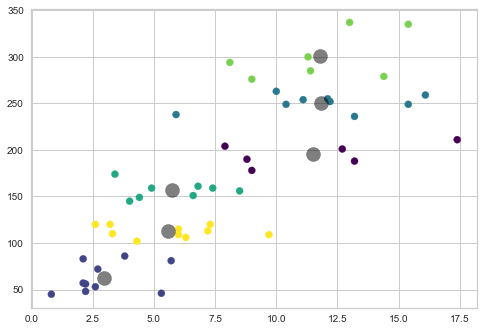

In [14]:
k_means = KMeans(n_clusters=6).fit(df)
kumeler = k_means.labels_
merkezler = k_means.cluster_centers_

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5);

In [15]:
pd.DataFrame({
    "Eyaletler": df.index, 
    "Kumeler": kumeler},
).head()

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,4
3,Arkansas,0
4,California,4


In [16]:
df["Kume_No"] = kumeler
df.head()

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,4
